AnitaSoroush-98222085-MachineLearning-Project1-Task2

In [73]:
from google.colab import drive
import sys
import os
import pandas as pd
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn import datasets
import os
import csv
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from sklearn import metrics
from sklearn.feature_selection import RFE
import time
from multiprocessing import Pool, cpu_count
import multiprocessing
import functools

Dataset link : https://www.kaggle.com/corrieaar/apartment-rental-offers-in-germany

In [140]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [74]:
! unzip /content/gdrive/MyDrive/immo_data.csv.zip

Archive:  /content/gdrive/MyDrive/immo_data.csv.zip
replace immo_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [176]:
data = pd.read_csv('immo_data.csv')

In [76]:
data.shape

(268850, 49)

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [77]:
data.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [12]:
nulls = data.isnull().sum()/268850 *100
nulls

regio1                       0.000000
serviceCharge                2.569834
heatingType                 16.684397
telekomTvOffer              12.132788
telekomHybridUploadSpeed    83.254603
newlyConst                   0.000000
balcony                      0.000000
picturecount                 0.000000
pricetrend                   0.681421
telekomUploadSpeed          12.407662
totalRent                   15.070485
yearConstructed             21.218151
scoutId                      0.000000
noParkSpaces                65.388879
firingTypes                 21.188023
hasKitchen                   0.000000
geo_bln                      0.000000
cellar                       0.000000
yearConstructedRange        21.218151
baseRent                     0.000000
houseNumber                 26.415473
livingSpace                  0.000000
geo_krs                      0.000000
condition                   25.474800
interiorQual                41.906267
petsAllowed                 42.615957
street      

In [14]:
data.describe()

,geo_plz,yearConstructed,livingSpace,noRooms,totalRent,floor
count,268850.000000,211805.000000,268850.000000,268850.000000,2.283330e+05,217541.000000
mean,37283.022235,1966.400590,74.355548,2.641261,9.013315e+02,2.122405
std,27798.037296,46.992207,254.759208,2.633440,3.323833e+04,3.634934
min,852.000000,1000.000000,0.000000,1.000000,0.000000e+00,-1.000000
25%,9128.000000,1950.000000,54.000000,2.000000,4.698000e+02,1.000000
50%,38667.000000,1973.000000,67.320000,3.000000,6.500000e+02,2.000000
75%,57072.000000,1996.000000,87.000000,3.000000,9.850000e+02,3.000000
max,99998.000000,2090.000000,111111.000000,999.990000,1.575154e+07,999.000000


In [177]:
columns_to_keep = ["regio1", "geo_plz", "heatingType",
                "newlyConst", "yearConstructed", "cellar",
                "livingSpace", "condition", "typeOfFlat","noRooms", "garden",
                "totalRent", "hasKitchen", "lift", "floor", 
                'heatingType','condition' ,'typeOfFlat']
data = data[columns_to_keep]
nulls = data.isnull().sum()/268850 *100
nulls

regio1              0.000000
geo_plz             0.000000
heatingType        16.684397
newlyConst          0.000000
yearConstructed    21.218151
cellar              0.000000
livingSpace         0.000000
condition          25.474800
typeOfFlat         13.618747
noRooms             0.000000
garden              0.000000
totalRent          15.070485
hasKitchen          0.000000
lift                0.000000
floor              19.084620
heatingType        16.684397
condition          25.474800
typeOfFlat         13.618747
dtype: float64

In [79]:
data.head()

,regio1,geo_plz,heatingType,newlyConst,yearConstructed,cellar,livingSpace,condition,typeOfFlat,noRooms,garden,totalRent,hasKitchen,lift,floor,heatingType,condition,typeOfFlat
0,Nordrhein_Westfalen,44269,central_heating,False,1965.0,True,86.00,well_kept,ground_floor,4.0,True,840.0,False,False,1.0,central_heating,well_kept,ground_floor
1,Rheinland_Pfalz,67459,self_contained_central_heating,False,1871.0,False,89.00,refurbished,ground_floor,3.0,False,NaN,False,False,NaN,self_contained_central_heating,refurbished,ground_floor
2,Sachsen,1097,floor_heating,True,2019.0,True,83.80,first_time_use,apartment,3.0,False,1300.0,False,True,3.0,floor_heating,first_time_use,apartment
3,Sachsen,9599,district_heating,False,1964.0,False,58.15,NaN,other,3.0,False,NaN,False,False,3.0,district_heating,NaN,other
4,Bremen,28213,self_contained_central_heating,False,1950.0,False,84.97,refurbished,apartment,3.0,False,903.0,False,False,1.0,self_contained_central_heating,refurbished,apartment


Removing the outliers using 3 techniques: 

In [144]:
# this function returns a pandas dataframe that does not have outlier any more. 
def outlier_ditector(column, upper, lower, df):
    return df[(df[column]<upper) & (df[column]>lower)]

Technique 1: One loop **without chunking**

In [145]:
# the following list contains numerical columns that may have outlier
columns = ["livingSpace", "noRooms", "totalRent", "floor"]

newdata = data.copy()
sum = 0

print("number of records before putting outliers aside:" , newdata.shape[0])
for column in columns:
    s_time = time.time()
    upper = newdata[column].mean() + 3*newdata[column].std()
    lower = newdata[column].mean() - 3*newdata[column].std()
    newdata= newdata[(newdata[column]<upper) & (newdata[column]>lower)]
    sum = sum + time.time() - s_time

print(f'whole run time: {sum}')
print("number of records after putting outliers aside:" , newdata.shape[0])

number of records before putting outliers aside: 268850
whole run time: 0.14275002479553223
number of records after putting outliers aside: 187513


Technique 2: **Chunking up** the dataset into two parts and detect their outliers in two **consecutive** loops

```
# This is formatted as code
```



In [85]:
# the folloing function chunks up the dataset into two parts.
def chunker(df):
    num_of_rows = df.shape[0]
    df1 = df[0:int(num_of_rows/2)][:]
    df2 = df[int(num_of_rows/2):num_of_rows][:]
    chunks = [df1, df2]
    return chunks

In [86]:
# the following list contains numerical columns that may have outlier
columns = ["livingSpace", "noRooms", "totalRent", "floor"]

print("number of records before putting outliers aside:" , data.shape[0])
newdata = data.copy()
sum = 0

for column in columns:
    chunks = chunker(newdata)

    s_time = time.time()
    upper = newdata[column].mean() + 3*newdata[column].std()
    lower = newdata[column].mean() - 3*newdata[column].std()
    outlier_ditector1 = functools.partial(outlier_ditector, column, upper, lower)
    res_list = list(map(outlier_ditector1, chunks))
    sum = sum + time.time() - s_time

    newdata = pd.concat(res_list)

print(f'whole run time: {sum}')
print("number of records after putting outliers aside:" , newdata.shape[0])


number of records before putting outliers aside: 268850
whole run time: 0.33659958839416504
number of records after putting outliers aside: 187513


Technique 3:  **Chunking up** and **parallelism**

In [181]:

# the following list contains numerical columns that may have outlier
columns = ["livingSpace", "noRooms", "totalRent", "floor"]

print("number of records before putting outliers aside:" , data.shape[0])
newdata = data.copy()
sum = 0

from multiprocessing import Pool
for column in columns:
    chunks = chunker(newdata)

    s_time = time.time()
    upper = newdata[column].mean() + 3*newdata[column].std()
    lower = newdata[column].mean() - 3*newdata[column].std()
    with Pool(cpu_count()) as p:
        outlier_ditector1 = functools.partial(outlier_ditector, column, upper, lower)
        res_list = list(p.imap(outlier_ditector1, chunks))    
    sum = sum + (time.time() - s_time)
    newdata = pd.concat(res_list)

print(f'run time mean: {sum}')
print("number of records after putting outliers aside:" , newdata.shape[0])

number of records before putting outliers aside: 268850
run time mean: 6.009257555007935
number of records after putting outliers aside: 187513


From now on I use the newdata (which does not contain outlier) :

In [182]:
data = newdata

In [147]:
data.shape

(187513, 18)

In [148]:
nulls = data.isnull().sum()/data.shape[0] *100
nulls

regio1              0.000000
geo_plz             0.000000
heatingType        13.988897
newlyConst          0.000000
yearConstructed    19.882355
cellar              0.000000
livingSpace         0.000000
condition          22.176596
typeOfFlat         13.440135
noRooms             0.000000
garden              0.000000
totalRent           0.000000
hasKitchen          0.000000
lift                0.000000
floor               0.000000
heatingType        13.988897
condition          22.176596
typeOfFlat         13.440135
dtype: float64

Replacing Null values:

Technique 1: column by column **consecutively**

In [149]:
def null_filler(column):
    return column.fillna("NotAvailable") 

In [ ]:
data.head()

,regio1,geo_plz,heatingType,newlyConst,balcony,yearConstructed,cellar,livingSpace,condition,typeOfFlat,noRooms,garden,totalRent,hasKitchen,street,lift,floor
0,Nordrhein_Westfalen,44269,central_heating,False,False,1965.0,True,86.00,well_kept,ground_floor,4.0,True,840.0,False,Sch&uuml;ruferstra&szlig;e,False,1.0
2,Sachsen,1097,floor_heating,True,True,2019.0,True,83.80,first_time_use,apartment,3.0,False,1300.0,False,Turnerweg,True,3.0
4,Bremen,28213,self_contained_central_heating,False,True,1950.0,False,84.97,refurbished,apartment,3.0,False,903.0,False,Hermann-Henrich-Meier-Allee,False,1.0
6,Sachsen,9599,self_contained_central_heating,False,False,NaN,True,62.00,fully_renovated,NaN,2.0,True,380.0,False,Am Bahnhof,False,1.0
8,Baden_Württemberg,79211,oil_heating,False,False,1970.0,True,53.00,well_kept,roof_storey,2.0,False,690.0,True,no_information,False,2.0


In [178]:
columns = ["heatingType", "condition", "typeOfFlat"]

reformed_data = data.copy()

s_time = time.time()
for column in columns:
    reformed_data[column] = null_filler(reformed_data[column])
print(f'run time : {time.time() - s_time}')

run time : 0.18060016632080078


In [94]:
data.head()

,regio1,geo_plz,heatingType,newlyConst,yearConstructed,cellar,livingSpace,condition,typeOfFlat,noRooms,garden,totalRent,hasKitchen,lift,floor,heatingType,condition,typeOfFlat
0,Nordrhein_Westfalen,44269,central_heating,False,1965.0,True,86.00,well_kept,ground_floor,4.0,True,840.0,False,False,1.0,central_heating,well_kept,ground_floor
2,Sachsen,1097,floor_heating,True,2019.0,True,83.80,first_time_use,apartment,3.0,False,1300.0,False,True,3.0,floor_heating,first_time_use,apartment
4,Bremen,28213,self_contained_central_heating,False,1950.0,False,84.97,refurbished,apartment,3.0,False,903.0,False,False,1.0,self_contained_central_heating,refurbished,apartment
6,Sachsen,9599,self_contained_central_heating,False,NaN,True,62.00,fully_renovated,NaN,2.0,True,380.0,False,False,1.0,self_contained_central_heating,fully_renovated,NaN
8,Baden_Württemberg,79211,oil_heating,False,1970.0,True,53.00,well_kept,roof_storey,2.0,False,690.0,True,False,2.0,oil_heating,well_kept,roof_storey


Technique 2: **Parellelism** using **Dask**

In [120]:
!python -m pip install "dask[complete]"

In [96]:
import dask
from dask import delayed

In [179]:
columns = [data["heatingType"] , data["condition"], data["typeOfFlat"]]
result = []

s_time = time.time()
for column in columns:
    column = delayed(null_filler)(column)
    result.append(column)
print(f'run time : {time.time() - s_time}')

run time : 0.0008747577667236328


In [180]:
data = reformed_data
data.head()

,regio1,geo_plz,heatingType,newlyConst,yearConstructed,cellar,livingSpace,condition,typeOfFlat,noRooms,garden,totalRent,hasKitchen,lift,floor,heatingType,condition,typeOfFlat
0,Nordrhein_Westfalen,44269,central_heating,False,1965.0,True,86.00,well_kept,ground_floor,4.0,True,840.0,False,False,1.0,central_heating,well_kept,ground_floor
1,Rheinland_Pfalz,67459,self_contained_central_heating,False,1871.0,False,89.00,refurbished,ground_floor,3.0,False,NaN,False,False,NaN,self_contained_central_heating,refurbished,ground_floor
2,Sachsen,1097,floor_heating,True,2019.0,True,83.80,first_time_use,apartment,3.0,False,1300.0,False,True,3.0,floor_heating,first_time_use,apartment
3,Sachsen,9599,district_heating,False,1964.0,False,58.15,NotAvailable,other,3.0,False,NaN,False,False,3.0,district_heating,NotAvailable,other
4,Bremen,28213,self_contained_central_heating,False,1950.0,False,84.97,refurbished,apartment,3.0,False,903.0,False,False,1.0,self_contained_central_heating,refurbished,apartment


In [152]:
nulls = data.isnull().sum()/data.shape[0] *100
nulls

regio1              0.000000
geo_plz             0.000000
heatingType         0.000000
newlyConst          0.000000
yearConstructed    19.882355
cellar              0.000000
livingSpace         0.000000
condition           0.000000
typeOfFlat          0.000000
noRooms             0.000000
garden              0.000000
totalRent           0.000000
hasKitchen          0.000000
lift                0.000000
floor               0.000000
heatingType         0.000000
condition           0.000000
typeOfFlat          0.000000
dtype: float64

In [153]:
data.dropna(subset=["yearConstructed"], inplace=True)

In [102]:
len(data[data["yearConstructed"]>2022])

4

In [103]:
data = data.loc[data["yearConstructed"] <= 2022]

In [104]:
nulls = data.isnull().sum()/data.shape[0] *100
nulls

regio1             0.0
geo_plz            0.0
heatingType        0.0
newlyConst         0.0
yearConstructed    0.0
cellar             0.0
livingSpace        0.0
condition          0.0
typeOfFlat         0.0
noRooms            0.0
garden             0.0
totalRent          0.0
hasKitchen         0.0
lift               0.0
floor              0.0
heatingType        0.0
condition          0.0
typeOfFlat         0.0
dtype: float64

In [108]:
data.duplicated().any()

True

In [109]:
data.shape[0]

150227

In [110]:
data = data.drop_duplicates()

In [112]:
data.shape

(146112, 18)

EDA

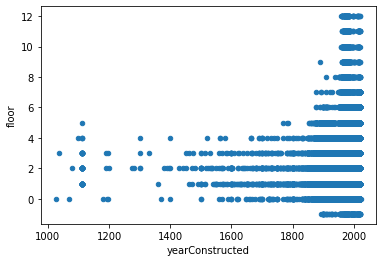

In [114]:
data.plot.scatter(x='yearConstructed', y='floor')

In [115]:
nulls = data.isnull().sum()/data.shape[0] *100
nulls

regio1             0.0
geo_plz            0.0
heatingType        0.0
newlyConst         0.0
yearConstructed    0.0
cellar             0.0
livingSpace        0.0
condition          0.0
typeOfFlat         0.0
noRooms            0.0
garden             0.0
totalRent          0.0
hasKitchen         0.0
lift               0.0
floor              0.0
heatingType        0.0
condition          0.0
typeOfFlat         0.0
dtype: float64

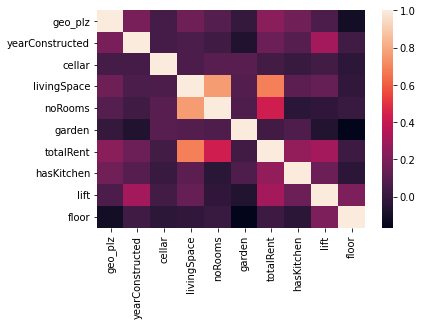

In [121]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [122]:
data.describe()

,geo_plz,yearConstructed,livingSpace,noRooms,totalRent,floor
count,146112.000000,146112.000000,146112.000000,146112.00000,146112.000000,146112.000000
mean,36047.263264,1965.204638,72.801171,2.63104,819.745603,2.095913
std,27807.370519,46.751619,30.294679,0.94900,618.512841,1.586489
min,1057.000000,1027.000000,0.000000,1.00000,0.000000,-1.000000
25%,9120.000000,1940.000000,54.660000,2.00000,470.000000,1.000000
50%,37339.000000,1972.000000,67.000000,3.00000,650.000000,2.000000
75%,54292.000000,1996.000000,85.000000,3.00000,990.000000,3.000000
max,99994.000000,2022.000000,527.000000,10.00000,64651.000000,12.000000


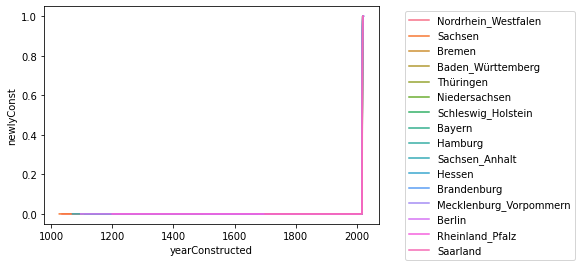

In [118]:
plot = sns.lineplot(data=data, x="yearConstructed", y="newlyConst", hue="regio1", ci=None)
plot.legend(loc='upper right', bbox_to_anchor=(1.6, 1))

In [119]:
data.drop(['newlyConst'],axis=1,inplace = True)

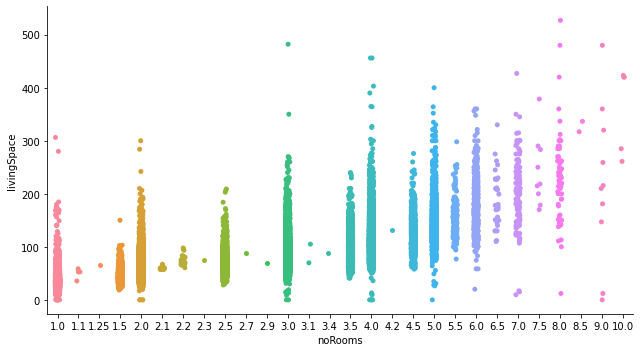

In [123]:
sns.catplot(x="noRooms", y="livingSpace", data=data)
fig = plt.gcf()
fig.set_size_inches(10, 5)

In [ ]:
# sns.catplot(x="totalRent", y="regio1",kind="swarm", hue="garden", data=data)

[Text(0, 0, 'Nordrhein_Westfalen'),
 Text(0, 0, 'Sachsen'),
 Text(0, 0, 'Bremen'),
 Text(0, 0, 'Baden_Württemberg'),
 Text(0, 0, 'Thüringen'),
 Text(0, 0, 'Niedersachsen'),
 Text(0, 0, 'Schleswig_Holstein'),
 Text(0, 0, 'Bayern'),
 Text(0, 0, 'Hamburg'),
 Text(0, 0, 'Sachsen_Anhalt'),
 Text(0, 0, 'Hessen'),
 Text(0, 0, 'Berlin'),
 Text(0, 0, 'Brandenburg'),
 Text(0, 0, 'Mecklenburg_Vorpommern'),
 Text(0, 0, 'Rheinland_Pfalz'),
 Text(0, 0, 'Saarland')]

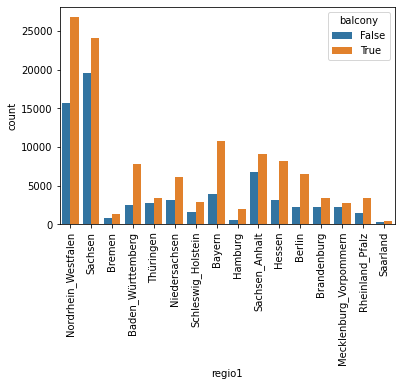

In [ ]:
chart = sns.countplot(x="regio1", hue="balcony", data=data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [155]:
data['yearBins'] = pd.cut(x=data['yearConstructed'], bins=[1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000])

[Text(0, 0, '(1000, 1100]'),
 Text(0, 0, '(1100, 1200]'),
 Text(0, 0, '(1200, 1300]'),
 Text(0, 0, '(1300, 1400]'),
 Text(0, 0, '(1400, 1500]'),
 Text(0, 0, '(1500, 1600]'),
 Text(0, 0, '(1600, 1700]'),
 Text(0, 0, '(1700, 1800]'),
 Text(0, 0, '(1800, 1900]'),
 Text(0, 0, '(1900, 2000]')]

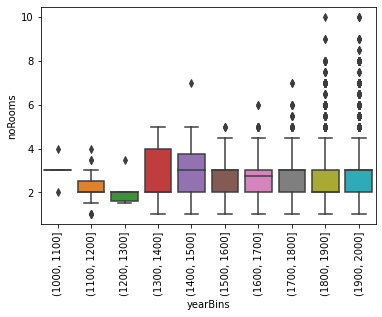

In [156]:
chart = sns.boxplot(x="yearBins", y="noRooms", data=data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

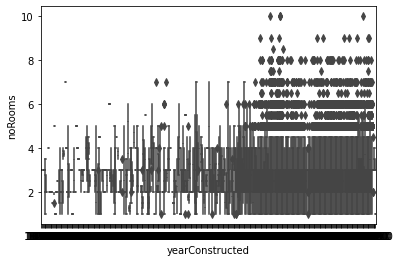

In [ ]:
ax = sns.boxplot(x="yearConstructed", y="noRooms", data=data)

[Text(0, 0, 'Nordrhein_Westfalen'),
 Text(0, 0, 'Sachsen'),
 Text(0, 0, 'Bremen'),
 Text(0, 0, 'Baden_Württemberg'),
 Text(0, 0, 'Thüringen'),
 Text(0, 0, 'Niedersachsen'),
 Text(0, 0, 'Schleswig_Holstein'),
 Text(0, 0, 'Bayern'),
 Text(0, 0, 'Hamburg'),
 Text(0, 0, 'Sachsen_Anhalt'),
 Text(0, 0, 'Hessen'),
 Text(0, 0, 'Brandenburg'),
 Text(0, 0, 'Mecklenburg_Vorpommern'),
 Text(0, 0, 'Berlin'),
 Text(0, 0, 'Rheinland_Pfalz'),
 Text(0, 0, 'Saarland')]

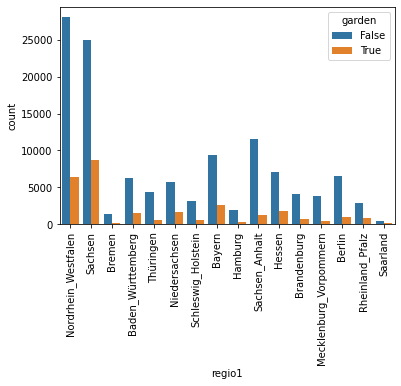

In [157]:
chart = sns.countplot(x="regio1", hue="garden", data=data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

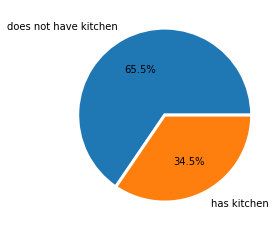

In [ ]:
conditions = ['does not have kitchen', 'has kitchen']
doesNotHave = len(data[data['hasKitchen'] == 0])
doesHave = len(data[data['hasKitchen'] == 1])
all_cases_in_each_group = [doesNotHave, doesHave]
plt.pie(all_cases_in_each_group, labels=conditions, labeldistance=1.15, autopct='%1.1f%%',wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
plt.show()

[Text(0, 0, 'Nordrhein_Westfalen'),
 Text(0, 0, 'Sachsen'),
 Text(0, 0, 'Bremen'),
 Text(0, 0, 'Baden_Württemberg'),
 Text(0, 0, 'Thüringen'),
 Text(0, 0, 'Niedersachsen'),
 Text(0, 0, 'Schleswig_Holstein'),
 Text(0, 0, 'Bayern'),
 Text(0, 0, 'Hamburg'),
 Text(0, 0, 'Sachsen_Anhalt'),
 Text(0, 0, 'Hessen'),
 Text(0, 0, 'Berlin'),
 Text(0, 0, 'Brandenburg'),
 Text(0, 0, 'Mecklenburg_Vorpommern'),
 Text(0, 0, 'Rheinland_Pfalz'),
 Text(0, 0, 'Saarland')]

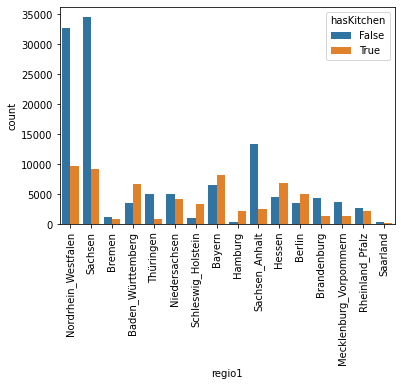

In [ ]:
chart = sns.countplot(x="regio1", hue="hasKitchen", data=data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

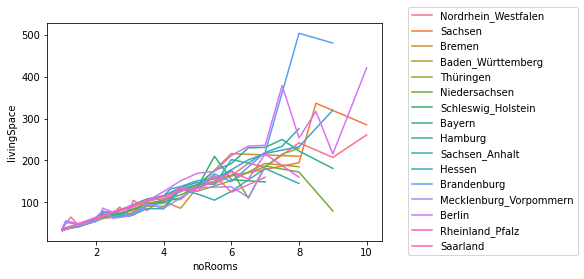

In [124]:
plt=sns.lineplot(data=data, x="noRooms", y="livingSpace", hue="regio1", ci=None)
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1.1))

No handles with labels found to put in legend.


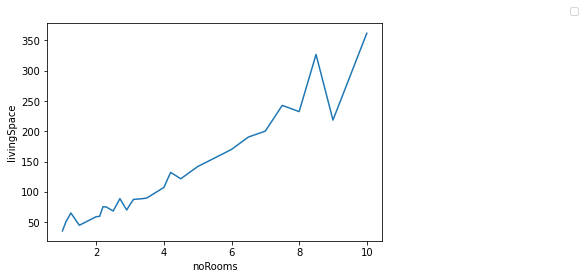

In [125]:
plt=sns.lineplot(data=data, x="noRooms", y="livingSpace", ci=None)
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1.1))

In [158]:
data.drop(['noRooms'],axis=1,inplace = True)

[Text(0, 0, 'Nordrhein_Westfalen'),
 Text(0, 0, 'Sachsen'),
 Text(0, 0, 'Bremen'),
 Text(0, 0, 'Baden_Württemberg'),
 Text(0, 0, 'Thüringen'),
 Text(0, 0, 'Niedersachsen'),
 Text(0, 0, 'Schleswig_Holstein'),
 Text(0, 0, 'Bayern'),
 Text(0, 0, 'Hamburg'),
 Text(0, 0, 'Sachsen_Anhalt'),
 Text(0, 0, 'Hessen'),
 Text(0, 0, 'Brandenburg'),
 Text(0, 0, 'Mecklenburg_Vorpommern'),
 Text(0, 0, 'Berlin'),
 Text(0, 0, 'Rheinland_Pfalz'),
 Text(0, 0, 'Saarland')]

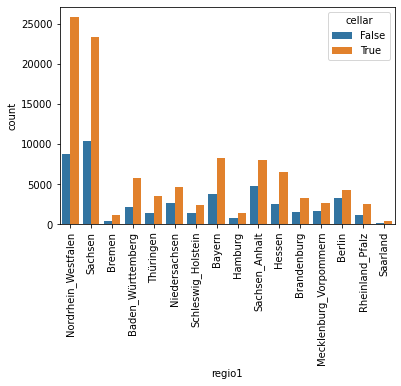

In [159]:
chart = sns.countplot(x="regio1", hue="cellar", data=data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Nordrhein_Westfalen'),
 Text(0, 0, 'Sachsen'),
 Text(0, 0, 'Bremen'),
 Text(0, 0, 'Baden_Württemberg'),
 Text(0, 0, 'Thüringen'),
 Text(0, 0, 'Niedersachsen'),
 Text(0, 0, 'Schleswig_Holstein'),
 Text(0, 0, 'Bayern'),
 Text(0, 0, 'Hamburg'),
 Text(0, 0, 'Sachsen_Anhalt'),
 Text(0, 0, 'Hessen'),
 Text(0, 0, 'Brandenburg'),
 Text(0, 0, 'Mecklenburg_Vorpommern'),
 Text(0, 0, 'Berlin'),
 Text(0, 0, 'Rheinland_Pfalz'),
 Text(0, 0, 'Saarland')]

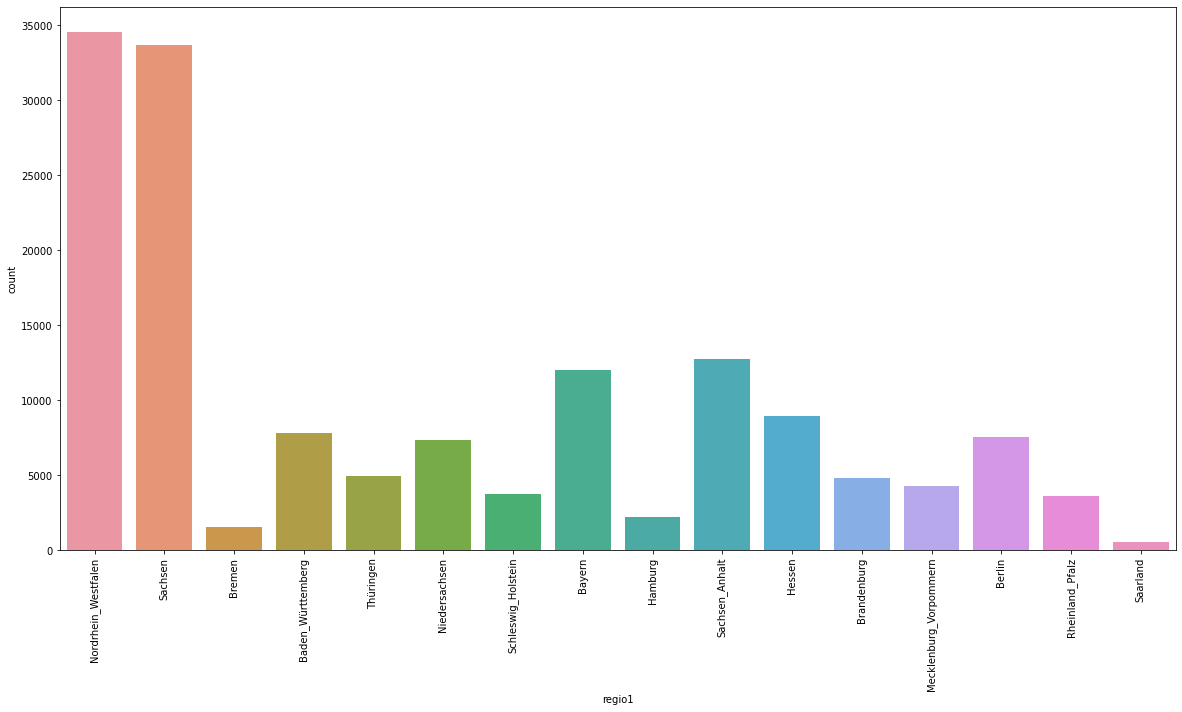

In [ ]:
chart = sns.countplot(data['regio1'])
fig = plt.gcf()
fig.set_size_inches(20, 10)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'ground_floor'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'roof_storey'),
 Text(0, 0, 'Not Available'),
 Text(0, 0, 'terraced_flat'),
 Text(0, 0, 'other'),
 Text(0, 0, 'maisonette'),
 Text(0, 0, 'raised_ground_floor'),
 Text(0, 0, 'penthouse'),
 Text(0, 0, 'half_basement'),
 Text(0, 0, 'loft')]

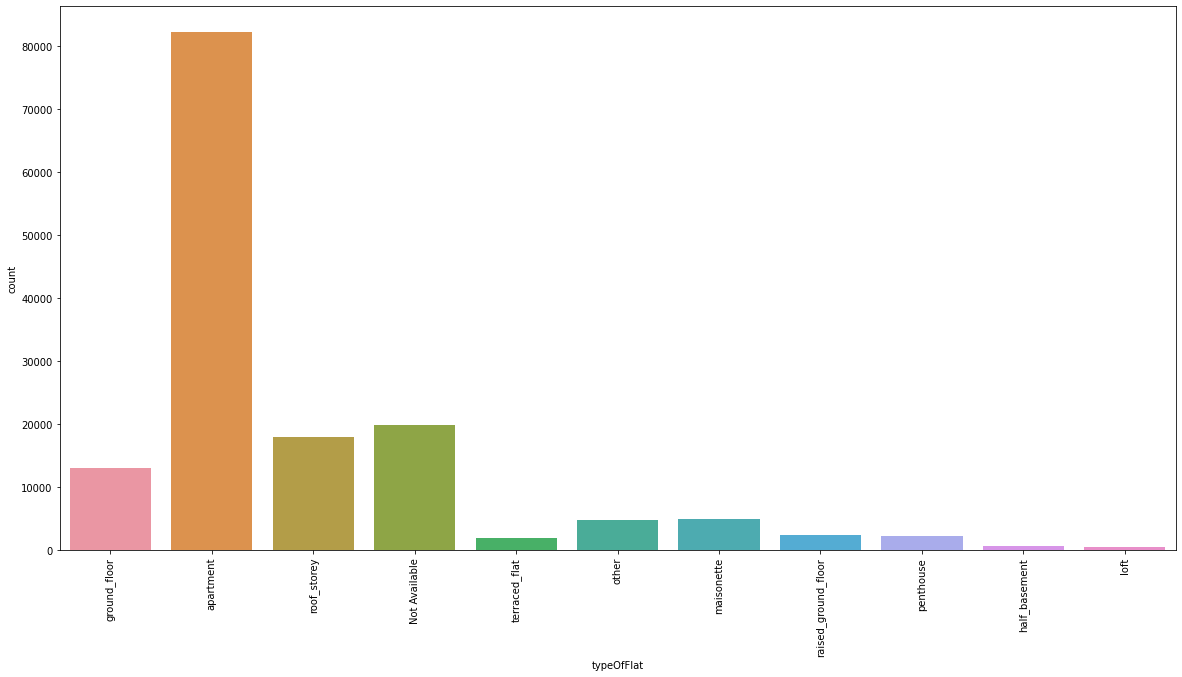

In [ ]:
chart = sns.countplot(data['typeOfFlat'])
fig = plt.gcf()
fig.set_size_inches(20, 10)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'well_kept'),
 Text(0, 0, 'first_time_use'),
 Text(0, 0, 'refurbished'),
 Text(0, 0, 'Not Available'),
 Text(0, 0, 'first_time_use_after_refurbishment'),
 Text(0, 0, 'mint_condition'),
 Text(0, 0, 'fully_renovated'),
 Text(0, 0, 'modernized'),
 Text(0, 0, 'negotiable'),
 Text(0, 0, 'need_of_renovation'),
 Text(0, 0, 'ripe_for_demolition')]

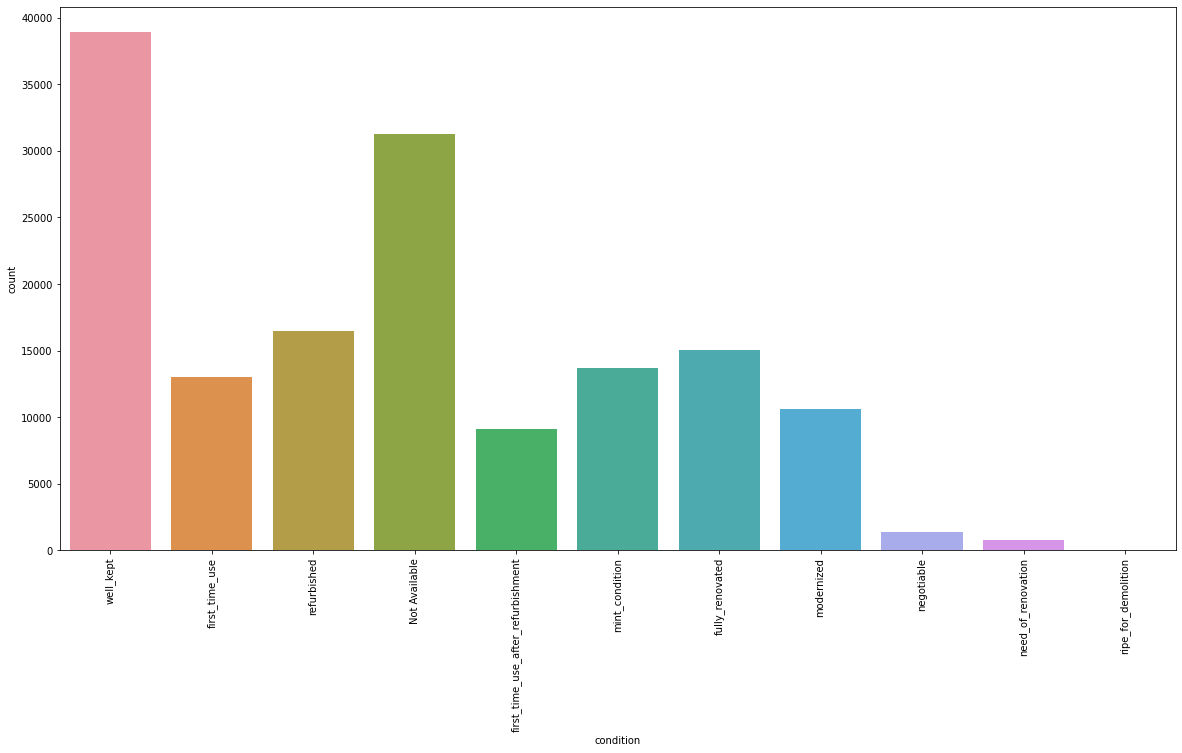

In [ ]:
chart = sns.countplot(data['condition'])
fig = plt.gcf()
fig.set_size_inches(20, 10)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

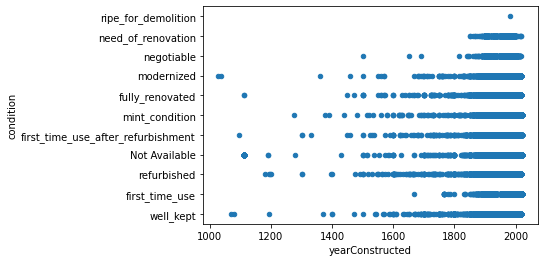

In [ ]:
data.plot.scatter(x='yearConstructed', y='condition')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


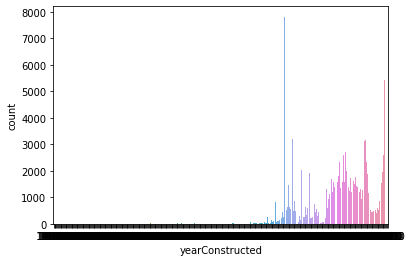

In [ ]:
chart = sns.countplot(data['yearConstructed'])

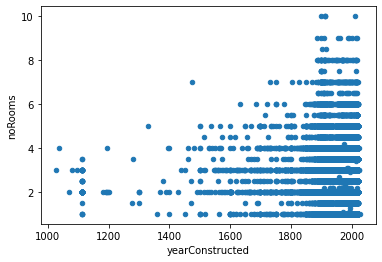

In [ ]:
data.plot.scatter(x='yearConstructed', y='noRooms')

In [160]:
data.groupby('regio1', as_index=False)['totalRent'].mean()

,regio1,totalRent
0,Baden_Württemberg,1155.408211
1,Bayern,1231.976816
2,Berlin,1378.129993
3,Brandenburg,664.131449
4,Bremen,806.204912
5,Hamburg,1394.259044
6,Hessen,1211.329766
7,Mecklenburg_Vorpommern,552.381508
8,Niedersachsen,783.801472
9,Nordrhein_Westfalen,784.308084


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Nordrhein_Westfalen'),
 Text(0, 0, 'Sachsen'),
 Text(0, 0, 'Bremen'),
 Text(0, 0, 'Baden_Württemberg'),
 Text(0, 0, 'Thüringen'),
 Text(0, 0, 'Niedersachsen'),
 Text(0, 0, 'Schleswig_Holstein'),
 Text(0, 0, 'Bayern'),
 Text(0, 0, 'Hamburg'),
 Text(0, 0, 'Sachsen_Anhalt'),
 Text(0, 0, 'Hessen'),
 Text(0, 0, 'Brandenburg'),
 Text(0, 0, 'Mecklenburg_Vorpommern'),
 Text(0, 0, 'Berlin'),
 Text(0, 0, 'Rheinland_Pfalz'),
 Text(0, 0, 'Saarland')]

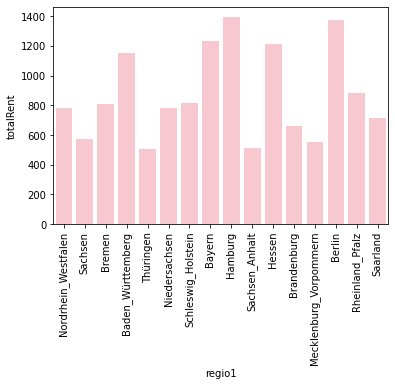

In [162]:
plot = sns.barplot('regio1', 'totalRent', data=data, ci=False, color="pink")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


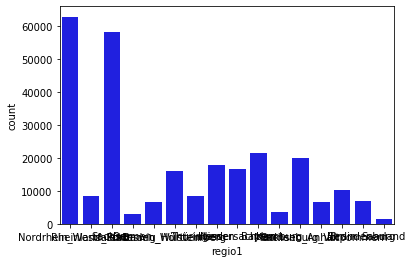

In [ ]:
sns.countplot('regio1', data = data, color="blue")

In [126]:
data.head()

,regio1,geo_plz,heatingType,yearConstructed,cellar,livingSpace,condition,typeOfFlat,noRooms,garden,totalRent,hasKitchen,lift,floor,heatingType,condition,typeOfFlat
0,Nordrhein_Westfalen,44269,central_heating,1965.0,True,86.00,well_kept,ground_floor,4.0,True,840.0,False,False,1.0,central_heating,well_kept,ground_floor
2,Sachsen,1097,floor_heating,2019.0,True,83.80,first_time_use,apartment,3.0,False,1300.0,False,True,3.0,floor_heating,first_time_use,apartment
4,Bremen,28213,self_contained_central_heating,1950.0,False,84.97,refurbished,apartment,3.0,False,903.0,False,False,1.0,self_contained_central_heating,refurbished,apartment
8,Baden_Württemberg,79211,oil_heating,1970.0,True,53.00,well_kept,roof_storey,2.0,False,690.0,True,False,2.0,oil_heating,well_kept,roof_storey
10,Sachsen,9130,NotAvailable,1930.0,True,40.20,NotAvailable,apartment,2.0,False,307.0,False,False,3.0,NotAvailable,NotAvailable,apartment


In [183]:
bool_cols = data.select_dtypes("bool").columns.tolist()
cat_cols = data.select_dtypes("object").columns.tolist()
num_cols = data.select_dtypes("number").columns.tolist()
print(cat_cols)

['regio1', 'heatingType', 'condition', 'typeOfFlat', 'heatingType', 'condition', 'typeOfFlat']


In [184]:
columns = ['regio1', 'heatingType', 'condition', 'typeOfFlat', 'heatingType', 'condition', 'typeOfFlat']
dummies_feature = pd.get_dummies(data[columns])
dummies_feature.head()

,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,...,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [185]:
data = pd.concat([data, dummies_feature], axis=1)
data.head()

,regio1,geo_plz,heatingType,newlyConst,yearConstructed,cellar,livingSpace,condition,typeOfFlat,noRooms,...,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,Nordrhein_Westfalen,44269,central_heating,False,1965.0,True,86.00,well_kept,ground_floor,4.0,...,0,1,0,0,0,0,0,0,0,0
2,Sachsen,1097,floor_heating,True,2019.0,True,83.80,first_time_use,apartment,3.0,...,1,0,0,0,0,0,0,0,0,0
4,Bremen,28213,self_contained_central_heating,False,1950.0,False,84.97,refurbished,apartment,3.0,...,1,0,0,0,0,0,0,0,0,0
6,Sachsen,9599,self_contained_central_heating,False,NaN,True,62.00,fully_renovated,NotAvailable,2.0,...,0,0,0,0,0,0,0,0,0,0
8,Baden_Württemberg,79211,oil_heating,False,1970.0,True,53.00,well_kept,roof_storey,2.0,...,0,0,0,0,0,0,0,0,1,0


In [186]:
columns = ['regio1', 'heatingType', 'condition', 'typeOfFlat', 'heatingType', 'condition', 'typeOfFlat']
data.drop(columns, axis=1, inplace=True)

In [188]:
data = data.drop(['yearConstructed'], axis=1)

In [168]:
nulls = data.isnull().sum()/data.shape[0] *100
nulls

geo_plz                           0.0
newlyConst                        0.0
yearConstructed                   0.0
cellar                            0.0
livingSpace                       0.0
                                 ... 
typeOfFlat_other                  0.0
typeOfFlat_penthouse              0.0
typeOfFlat_raised_ground_floor    0.0
typeOfFlat_roof_storey            0.0
typeOfFlat_terraced_flat          0.0
Length: 171, dtype: float64

In [190]:
from sklearn.model_selection import train_test_split
y = data['totalRent']
X = data.drop(['totalRent'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [194]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math

prediction = []
def fit_and_predic_linear_regression(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
            
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print('R2_score:', metrics.r2_score(y_test, y_pred))

    plt.scatter(y_pred, y_test)

fit_and_predic_linear_regression(X_train, y_train, X_test, y_test)

MAE: 173.47531706557996
MSE: 257243.24401621058
R2_score: 0.453644510212342
